In [1]:
import yfinance as yf

# Mengambil data harga saham Apple selama 5 tahun terakhir
data = yf.download('AAPL', start='2018-01-01', end='2023-01-01')

# Menampilkan beberapa baris pertama dari data
data.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.524338,40.533750,39.818585,40.030313,102223600
2018-01-03,40.517288,41.063072,40.453773,40.587864,118071600
2018-01-04,40.705479,40.808990,40.481991,40.590204,89738400
2018-01-05,41.168930,41.255972,40.710191,40.801939,94640000
2018-01-08,41.016029,41.312444,40.917221,41.016029,82271200


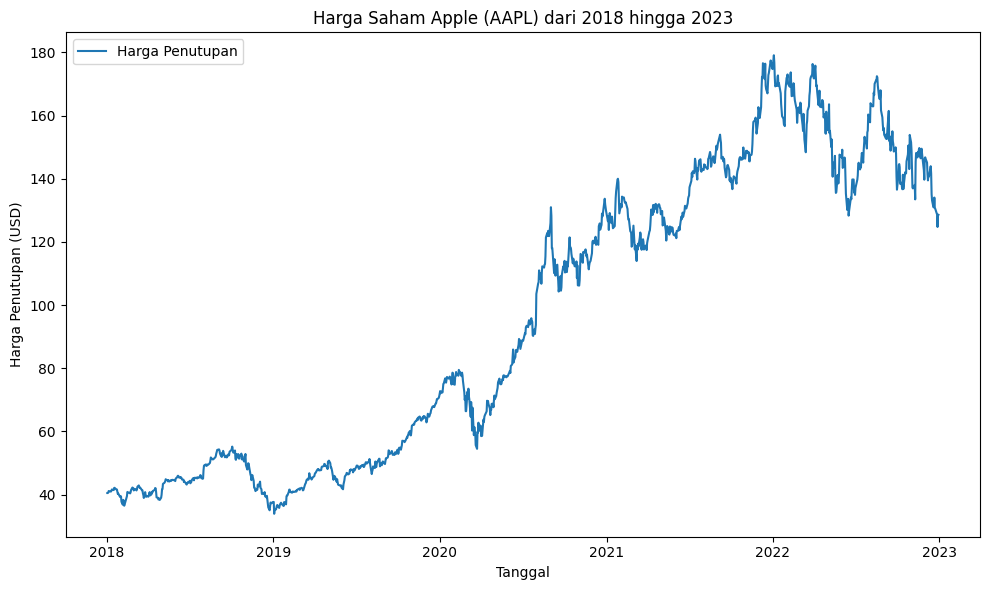

In [2]:
import matplotlib.pyplot as plt

# Visualisasi harga penutupan saham Apple
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Harga Penutupan')
plt.title('Harga Saham Apple (AAPL) dari 2018 hingga 2023')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan (USD)')
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
# Membuat salinan DataFrame untuk mencegah SettingWithCopyWarning
df = data[['Close']].copy()  # Salinan DataFrame yang aman

# Menggunakan .loc untuk menambahkan kolom 'Moving_Avg' (rata-rata bergerak)
df.loc[:, 'Moving_Avg'] = df['Close'].rolling(window=50).mean()

# Menghapus nilai yang hilang (NaN) akibat moving average
df = df.dropna()

# Menampilkan data yang sudah diproses
print(df.head())

Price           Close Moving_Avg
Ticker           AAPL           
Date                            
2018-03-14  42.149345  40.615322
2018-03-15  42.198948  40.648814
2018-03-16  42.050148  40.679472
2018-03-19  41.407642  40.693515
2018-03-20  41.393482  40.698006


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Membagi data menjadi fitur (X) dan target (y)
X = df[['Moving_Avg']]  # Fitur: Moving Average
y = df['Close']  # Target: Harga penutupan

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model regresi linier
model = LinearRegression()

# Melatih model
model.fit(X_train, y_train)

# Menghitung skor R^2 (akurasi model)
score = model.score(X_test, y_test)
print(f"Model R^2 Score: {score}")


Model R^2 Score: 0.968922688952317


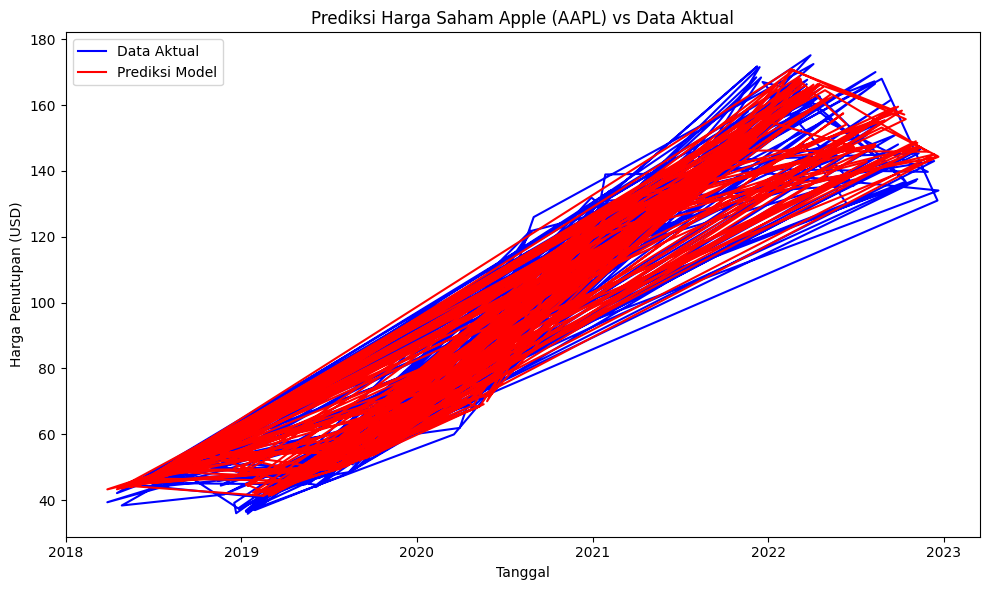

In [8]:
# Membuat prediksi untuk data uji
y_pred = model.predict(X_test)

# Visualisasi hasil prediksi dibandingkan dengan data aktual
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Data Aktual', color='blue')
plt.plot(y_test.index, y_pred, label='Prediksi Model', color='red')
plt.title('Prediksi Harga Saham Apple (AAPL) vs Data Aktual')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan (USD)')
plt.legend()
plt.tight_layout()
plt.show()


In [9]:
from tensorflow.keras.callbacks import EarlyStopping

# Menambahkan EarlyStopping untuk menghindari overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Melatih model dengan early stopping
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0027 - val_loss: 0.0022
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0019 - val_loss: 0.0022
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0021 - val_loss: 0.0032
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0022 - val_loss: 0.0026
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0018 - val_loss: 0.0030
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0020 - val_loss: 0.0030


In [1]:
# Mengambil data harga saham Apple selama 5 tahun terakhir
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Mengambil data harga saham Apple selama 5 tahun terakhir
data = yf.download('AAPL', start='2018-01-01', end='2023-01-01')

# Menyiapkan data untuk LSTM
data = data[['Close']]  # Menggunakan harga penutupan

# Normalisasi data untuk mempercepat proses pelatihan model LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Fungsi untuk membuat dataset dalam bentuk sekuensial (X, y)
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Menyiapkan data untuk pelatihan dan pengujian
time_step = 60
X, y = create_dataset(data_scaled, time_step)

# Membagi data menjadi data latih dan data uji
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Mengubah bentuk data untuk dimasukkan ke dalam LSTM (samples, time_step, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


[*********************100%***********************]  1 of 1 completed


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

# Membangun model LSTM dengan Input() di lapisan pertama
model = Sequential()

# Lapisan Input
model.add(Input(shape=(X_train.shape[1], 1)))

# Menambahkan lapisan LSTM pertama
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Menambahkan lapisan LSTM kedua
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Menambahkan lapisan Dense untuk output
model.add(Dense(units=1))

# Mengompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')

# Melatih model
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.1258
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0057
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0033
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0028
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0029
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0027
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0021
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0032
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0023
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0024


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step 


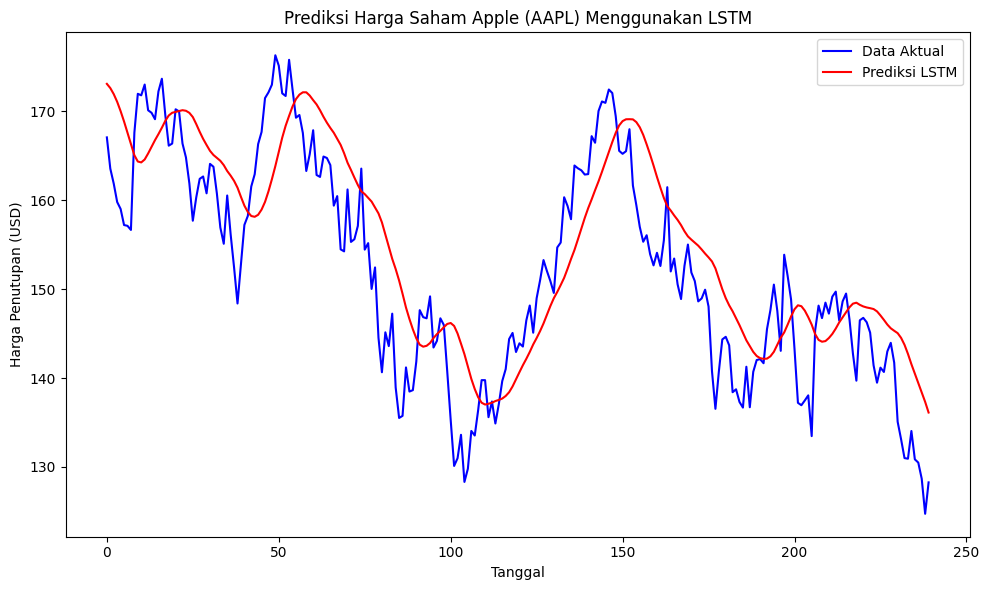

In [3]:
import matplotlib.pyplot as plt

# Memprediksi harga saham pada data uji
predictions = model.predict(X_test)

# Mengembalikan prediksi dan data asli ke skala harga asli
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform([y_test])

# Visualisasi hasil prediksi dibandingkan dengan data aktual
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual[0], label='Data Aktual', color='blue')
plt.plot(predictions, label='Prediksi LSTM', color='red')
plt.title('Prediksi Harga Saham Apple (AAPL) Menggunakan LSTM')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan (USD)')
plt.legend()
plt.tight_layout()
plt.show()


In [4]:
from tensorflow.keras.callbacks import EarlyStopping

# Menambahkan EarlyStopping untuk menghindari overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Melatih model dengan early stopping
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0017 - val_loss: 0.0022
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0020 - val_loss: 0.0026
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0018 - val_loss: 0.0027
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0021 - val_loss: 0.0026
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0018 - val_loss: 0.0046
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0021 - val_loss: 0.0021
